# Mushroom Classification

Mosaab Muhammad <br>
August 10th, 2019

## I. Definition
### Project Overview
#### Project Origin:
This problem is taken from **Kaggle**, named as [Mushroom Classification](https://www.kaggle.com/uciml/mushroom-classification), and collected by **UCI Machine Learning**.
#### Problem Domain:
Before delving into the problem, let me introduce you to the problem domain, which is related to mushroom classification, to determine whether it's _poisonous_ or _edible_. 
<br>
Since the collected data shows the mushroom features, let me make them crisp and clear for you, to be able to understand the big picture. 
<br>
I'll start by an image, showing the most important features for mushroom: 
<br>
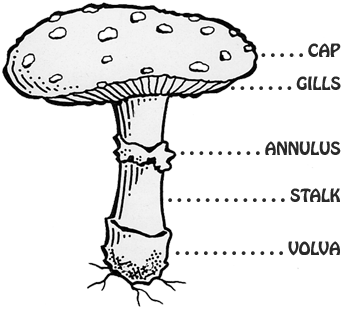


From the image, we can say that we have 5 main features of the mushroom:
1. **Cap:** which is the top part of the mushroom from above, which takes the umberlla shape.
2. **Gill:** which is the underside of the cap
3. **Ring:** which is this little shape that surround the stem (stalk).
4. **Stalk (Stem):** is what makes the mushroom standing, it's this vertical cylindrical.
5. **Veil (Volva):** which is the bottom shape of the mushroom, that covers the bottom part of the mushroom.
<br><br>

There are other features that is included in the dataset, such as:
- **Bruises**: Does the mushroom has bruises or not.
- **Spore Print Color**: Shows the color of the mushroom spores if viewed en masse. The image below shows how it looks like.[[1]](https://en.wikipedia.org/wiki/Spore_print) 
- **Oder**: Desribes the smell or the odor of the mushroom.
- **Population**: Shows what kind of populations that this mushroom grows.
- **Habitat**: Shows where it lives.
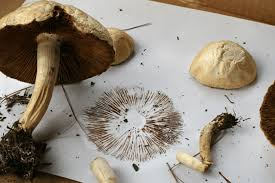

#### Attribute Information:
Now, let's look at the attributes of dataset, to know if we can understand now or not:
<br>
- **classes:** edible=e, poisonous=p

####  Features related to `Cap`:
- **cap-shape:** bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- **cap-surface:** fibrous=f, grooves=g, scaly=y, smooth=s
- **cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

#### Features related to `Gill`:
- **gill-attachment:** attached=a, descending=d, free=f, notched=n
- **gill-spacing:** close=c, crowded=w, distant=d
- **gill-size:** broad=b, narrow=n
- **gill-color:** black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

#### Features related to `Stalk`:
- **stalk-shape:** enlarging=e,tapering=t

- **stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- **stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- **stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#### Features related to `Veil`:
- **veil-type:** partial=p,universal=u

- **veil-color:** brown=n,orange=o,white=w,yellow=y

- **ring-number:** none=n,one=o,two=t

- **ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

#### `Misc` Features:
- **bruises:** bruises=t,no=f

- **odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- **spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- **population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- **habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Problem Statement
Our task here, is to be able to classify the mushroom whether it's _edible_ or _poisionous_ (Binary Classification), based on the given features.
<br>
Here's some inspirational questions, that I'm going to discover:
- What types of machine learning models perform best on this dataset?
- Which features are most indicative of a poisonous mushroom?
- Which features are most indicative of a edible mushroom?
<br>

**Point of View:** In my opinion, the last 2 questions are very important, because as a layman, he can take a look at the mushroom and determine whether it's edible or poisonous, I know, It's not that easy and it's very tricky to determine between them, but at least we can make a better decision based on data better than a decision based on nothing.

### Metrics
- Since we are concered about **Type II Error**, (false-negatives), meaning we don't want to say about the poisouous mushroom that it's safe, so I'm going to measure how well the predictions are based on the `Recall`.
- For this project, I'm going to use `Accuracy` to measure how well the prediction of the model is.
- For some reason, I'm going to use `ROC_AUC` Curve to measure how well the model is.

### Project Steps
- Import Libraries & Read Data:
- Explore the data:
    - I'll try a bar chart with each feature and how it relates to class/target feature.
- Preprocess the data:
    - Create dummy variables for each column.
    - Use PCA or t-SNE to reduce the number of dimensions.
    - ...
- Model the data:
    - Benchmark.
    - ...
- Evaluation:
    - ...
- Summary:
    - ...

## II. Analysis
### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%matplotlib inline
%precision 3
plt.style.use('ggplot')
sns.set_style('white')

### Read Data

In [ ]:
import os
print(os.listdir("../input"))

In [ ]:
df_origin = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
df = df_origin.copy()

In [ ]:
df.sample(6)

In [ ]:
df.info()

In [ ]:
# Let's see the shape of our dataframe
print("Shape of the data =", df.shape)

#### Observation:
Since all the columns are `Categorical`, and we have 23 columns. We need to dummy those columns and use PCA or t-SNE to reduce those columns.

### Descriptive Statistics:

In [ ]:
df.describe(include='all')

**Since in this dataset, the `veil-type` has only one value for each row, so I'm going to remove it.**

In [ ]:
del df['veil-type']

Let's see if the class column is balanced or not

In [ ]:
df['class'].value_counts().to_frame().style.background_gradient('summer')

# Looks like we have a balanced dataset.

In [ ]:
sorted_counts = df['class'].value_counts()
plt.pie(sorted_counts, labels=['Edible', 'Poisonous'], startangle=90, counterclock=False, autopct='%1.0f%%')
plt.axis('square');

## Exploratory Data Analysis (EDA)
In order to answer the first 2 questions, I'll take features one by one and see how it relates to the target class.
<br>

**Let's start with `Cap` Features:** [`cap-shape`, `cap-surface`, `cap-color`]

In [ ]:
# First, I'll change the label for each column instead of a letter to a word, just for the sake of visualization,
# then I'll return it back, in the data preprocessing.
df_visual = df.copy()
    
cap_shape = dict(b='bell', c='conical', x='convex', f='flat', k='knobbed', s='sunken')
cap_surface = dict(f='fibrous', g='grooves', y='scaly', s='smooth')
cap_color = dict(n='brown', b='buff', c='cinnamon', g='gray', r='green', p='pink', u='purple', e='red', w='white', y='yellow')

df_visual['cap-shape'] = df_visual['cap-shape'].map(cap_shape)
df_visual['cap-surface'] = df_visual['cap-surface'].map(cap_surface)
df_visual['cap-color'] = df_visual['cap-color'].map(cap_color)

In [ ]:
df_visual['class'] = df_visual['class'].map(dict(p='Poisonous', e='Edible'))

In [ ]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.countplot(x='cap-shape', data=df_visual, hue='class')
plt.title('Cap Shape')
plt.xticks(rotation=15)

plt.subplot(132)
sns.countplot(x='cap-surface', data=df_visual, hue='class')
plt.title('Cap Surface')

plt.subplot(133)
sns.countplot(x='cap-color', data=df_visual, hue='class');
plt.title('Cap Color')
plt.xticks(rotation=40)
mlt.rc('xtick', labelsize=14) 

plt.subplots_adjust(wspace=.2)

#### Observation:
1. `Cap Shape`:
    - there are a lot of `Bell` shaped mushrooms that are edible.
    - All the `Sunken` shaped mushrooms _in our data_ are edible, since our data has a fewer samples of them.
    - If you see `knobbed` shaped mushroom, don't take it, since a lot of them are poisonous.
    - There is no records for `Conical` shaped mushrooms in our data.
2. `Cap Surface`:
    - The `Smooth` and `Scaly` surface are more poisonous than the edible ones.
    - There are a lot of `Fibrous` surface mushrooms that are safe.
    - There is no records for `Grooves` surface mushrooms in our data.
3. `Cap Color`:
    - A lot of mushrooms have `brown` and `gray` cap color, and more of them are safe.
    - The `Yellow` and `Red` cap colors are the most dangours among all colors in the dataset.
    - The `White` cap color is the safest mushroom among all the colors in the dataset.
    - The `Green` and `Purple` have fewer data, and all of them are safe.

**NOTE:**
- Since finding an edible mushroom is a tricky issue, in the above observations, I'm talking by percent, how much this shape or color is safe and so on.
- The observations here is not ready to be applied, the applied observations will be at the end of this notebook.

**Let's take the `Gill` Feature, and see how we can get anything from it:** [`gill-attachment`, `gill-spacing`, `gill-size`, `gill-color`]

In [ ]:
# changing the label for each column instead of a letter to a word, just for the sake of visualization.

gill_attachment = dict(a='Attached', d='Descending', f='Free', n='Notched')
gill_spacing = dict(c='Close', w='Crowded', d='Distant')
gill_size = dict(b='Broad', n='Narrow')
gill_color = dict(n='Brown', b='Buff', g='Gray', r='Green', p='Pink', u='Purple', o='Orange',
                  h='Chocolate', k='Black', e='Red', w='White', y='Yellow')

df_visual['gill-attachment'] = df_visual['gill-attachment'].map(gill_attachment)
df_visual['gill-spacing'] = df_visual['gill-spacing'].map(gill_spacing)
df_visual['gill-size'] = df_visual['gill-size'].map(gill_size)
df_visual['gill-color'] = df_visual['gill-color'].map(gill_color)

In [ ]:
plt.figure(figsize=(16, 10))

plt.subplot(221)
sns.countplot(data=df_visual, x='gill-attachment', hue='class')
plt.title('Gill Attachment')

plt.subplot(222)
sns.countplot(data=df_visual, x='gill-spacing', hue='class')
plt.title('Gill Spacing')

plt.subplot(223)
sns.countplot(data=df_visual, x='gill-size', hue='class')
plt.title('Gill Size')

plt.subplot(224)
sns.countplot(data=df_visual, x='gill-color', hue='class')
plt.title('Gill Color')
plt.xticks(rotation=60)
mlt.rc('xtick', labelsize=12)


plt.subplots_adjust(wspace=.2, hspace=.4)

#### Observations:
- `Gill Attachment`:
    - If it's `Attached`, it's mostly safe, but it's hard to tell.
    - If it's `Free`, it doesn't add up much information.
- `Gill Spacing`:
    - If it's `Crowded`, then it's mostly edible.
    - It would be much safer, if you found mushroom with `Close Gill Spacing`, and didn't eat it.
- `Gill Size`:
    - If it's `Narrow`, then it's mostly poisonous.
    - If it's `Broad`, then it's mostly safe to eat, but take care.
- `Gill Color`:
    - The most poisonous color for gill mushroom is `Buff`, it's not safe at all.
    - The most safer color for gill is `Brown`, `White`, `Black`, and `Purple`.
    - It's hard to tell that `Orange`, `Red`, and `Yellow`, because we have a few data of them.

**Let's take the `Stalk` Feature, and see how it relates to edible or poisonous:** [`stalk-shape`, `stalk-root`, `stalk-surface-above-ring`, `stalk-surface-below-ring`, `stalk-color-above-ring`, `stalk-color-below-ring`]

In [ ]:
# changing the label for each column instead of a letter to a word, just for the sake of visualization. 
stalk_shape              = dict(e='enlarging',t='tapering')
stalk_root               = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted', '?':'missing'}
stalk_surface_above_ring = dict(f='fibrous',y='scaly',k='silky',s='smooth')
stalk_surface_below_ring = dict(f='fibrous',y='scaly',k='silky',s='smooth')
stalk_color_above_ring   = dict(n='brown', b='buff', c='cinnamon', g='gray', o='orange', p='pink', e='red',
                                w='white', y='yellow')
stalk_color_below_ring   = dict(n='brown', b='buff', c='cinnamon', g='gray', o='orange', p='pink', e='red',
                                w='white', y='yellow')

# Map all the new labels to its corresponding column
df_visual['stalk-shape']              = df_visual['stalk-shape'].map(stalk_shape)
df_visual['stalk-root']               = df_visual['stalk-root'].map(stalk_root)
df_visual['stalk-surface-above-ring'] = df_visual['stalk-surface-above-ring'].map(stalk_surface_above_ring)
df_visual['stalk-surface-below-ring'] = df_visual['stalk-surface-below-ring'].map(stalk_surface_below_ring)
df_visual['stalk-color-above-ring']   = df_visual['stalk-color-above-ring'].map(stalk_color_above_ring)
df_visual['stalk-color-below-ring']   = df_visual['stalk-color-below-ring'].map(stalk_color_below_ring)

In [ ]:
plt.figure(figsize=(18, 10))

plt.subplot(231)
sns.countplot(data=df_visual, x='stalk-shape', hue='class')
plt.title('Stalk Shape')

plt.subplot(232)
sns.countplot(data=df_visual, x='stalk-root', hue='class')
plt.title('Stalk Root')

plt.subplot(233)
sns.countplot(data=df_visual, x='stalk-surface-above-ring', hue='class')
plt.title('Stalk Surface Above Ring')


plt.subplot(234)
sns.countplot(data=df_visual, x='stalk-surface-below-ring', hue='class')
plt.title('Stalk Surface Below Ring')


plt.subplot(235)
sns.countplot(data=df_visual, x='stalk-color-above-ring', hue='class')
plt.title('Stalk Color Above Ring')
plt.xticks(rotation=40)

plt.subplot(236)
sns.countplot(data=df_visual, x='stalk-color-below-ring', hue='class')
plt.title('Stalk Color Below Ring')
plt.xticks(rotation=40)
mlt.rc('xtick', labelsize=14)

plt.subplots_adjust(wspace=.3, hspace=.4)

#### Observations:
- `Stalk Root`:
    - If the root is equal, club, or rooted, then it's mostly safe.
    
- `Stalk Surface`:
    - There are more safe mushrooms that has smooth stalk surface, than the poisnous ones.
    
- `Stalk Color`:
    - The more safer color for stalk is `White` and `Gray`.
    - The `Orange` is hard to tell, whether it's safe or not, since it has fewer records.
    - The most dangerous colors is `pink`, `buff`, and `brown`.

**Let's take the `Veil` and `Ring` Features, and see how it relates to edible or poisonous:** [`veil-type`, `veil-color`, `ring-number`, `ring-type`]

In [ ]:
# changing the label for each column instead of a letter to a word, just for the sake of visualization.

veil_color  = dict(n='brown', o='orange', w='white', y='yellow')
ring_number = dict(n='none', o='one', t='two')
ring_type   = dict(c='cobwebby', e='evanescent', f='flaring', l='large', n='none', p='pendant',
                   s='sheathing', z='zone')

df_visual['veil-color']  = df_visual['veil-color'].map(veil_color)
df_visual['ring-number'] = df_visual['ring-number'].map(ring_number)
df_visual['ring-type']   = df_visual['ring-type'].map(ring_type)

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(131)
sns.countplot(data=df_visual, x='veil-color', hue='class')
plt.title('Veil Color')

plt.subplot(132)
sns.countplot(data=df_visual, x='ring-number', hue='class')
plt.title('Ring Number')

plt.subplot(133)
sns.countplot(data=df_visual, x='ring-type', hue='class')
plt.title('Ring Type')
plt.xticks(rotation=15)
mlt.rc('xtick', labelsize=12)


plt.subplots_adjust(wspace=.2, hspace=.4)

#### Observations:
- `veil-color`:
    - This feature doesn't tell us much, since `Orange` and `Brown` are edible, but we have a fewer records to build a verdit based on it.
- `ring-number`:
    - It the mushroom has 2 rings, it's likely to be safe.
- `ring-type`:
    - If the mushroom has ring with type `Pendant` or `flaring`, then it's most likely to be edible.
    - If the mushroom has ring with type `evanescent` or `large`, then it's most likely to be poisonous.

**Time for the `Misc` Features: [`bruises`, `odor`, `spore-print-color`, `population`, `habitat`]**

In [ ]:
bruises           = dict(t='true', f='false')
odor              = dict(a='almond', l='anise', c='creosote', y='fishy', f='foul', m='musty', n='none', 
                         p='pungent', s='spicy')
spore_print_color = dict(k='black', n='brown', b='buff', h='chocoloate', r='green', o='Orange', u='Purple',
                        w='White', y='Yellow')
population        = dict(a='Abundant', c='Clustered', n='Numerous', s='Scattered', v='Several', y='Solitary')
habitat           = dict(g='Grasses', l='Leaves', m='Meadows', p='Paths', u='Urban', w='Waste', d='Woods')


df_visual['bruises']             = df_visual['bruises'].map(bruises)
df_visual['odor']                = df_visual['odor'].map(odor)
df_visual['spore-print-color']   = df_visual['spore-print-color'].map(spore_print_color)
df_visual['population']          = df_visual['population'].map(population)
df_visual['habitat']             = df_visual['habitat'].map(habitat)

In [ ]:
plt.figure(figsize=(18, 10))

labels = ['bruises', 'odor', 'spore-print-color', 'population', 'habitat']

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df_visual, x=label, hue='class')
    plt.title(label.capitalize())
    plt.xticks(rotation=40)

mlt.rc('xtick', labelsize=14)
plt.subplots_adjust(wspace=.3, hspace=.4)

#### Observations:
- `Bruises`:
    - It the mushroom has bruises, it's most likey to be edible, and vice versa.
- `Odor`:
    - If the mushroom has no smell, or the smell of `Almond` or `Anise`, then it's edible.
    - If the mushroom has the smell of `Pungent`, `foul`, `creosote`, `fishy`, `spicy`, or `musty`, then it's poisonous.
- `Spore Print Color`:
    - If the color is `Black` or `Brown`, then it's most likely to be edible.
    - If the color is `Chocoloate` or `White`, then it's most likely to be poisonous.
    - For the colors `Purple`, `Orange`, `Yellow`, `Buff`, or `Green`, we don't have enough records to build a verdit.
- `Population`:
    - If it's `Numerous` or `Abundant`, then it's edible.
    - If it's `Scattered` or `Solitary`, then it's most likely to be edible.
    - If it's `Several`, then it's most likely to be poisonous.
- `Habitat`:
    - It's most likely to be edible, if the habitat of the mushroom is `Grasses`, `Woods`, or `Waste`.
    - It's most likely to be poisonous, if the habitat of the mushroom is `Paths`, `Leaves`, or `Urban`.

#### NOTE:
From the observations above, you noticed that most of them are wrote using `IF` condition, which means that we can build a model, which likely to be a decision tree to make a prediction based on those conditions for each feature.

## III. Methodology

### Data Preprocessing
Since we have 21 features and every feature in that 21 features is _categorical_, then I'm going to use dummy variable to convert these features into numerical features, and as a result, the number of columns will increase based how unique values in each feature.
<br>

Then to reduce those n features, I'm going to use PCA and t-SNE (which is the state-of-the-art in reducing dimensionality).
<br>

After reducing some dimensionalities, I'm going to fit those new features to the models, and see which one gives best results.
<br>

### Dummy Variables:

In [ ]:
# Splite the featuers and target in two variables.
X = df.drop('class', axis=1)
y = df['class']

# For the sake of visualization, then I'll return it by hot-encoding.
y = y.map({'p': 'Posionous', 'e': 'Edible'}) 

print('Shape of X =', X.shape)
print('Shape of y =', y.shape)

In [ ]:
# Get dummy variables for each column in X.
X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.sample(5)

**We can see now that we have 95 columns**

In [ ]:
print('Number of columns generated from dummy variables =', len(X_dummy.columns.values),'Columns')

### PCA:
I'm going to convert the columns from 95 to 2 columns just for the sake of visualization. <br>

Then I'm going to see how many columns contain most of the data, to train our model. <br>

**And of course, before using PCA, we need to Standardize our data.**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
X_std = StandardScaler().fit_transform(X_dummy)
X_std

In [ ]:
# Reduce 95 features to 2 features to visualize it.
X_pca = PCA(n_components=2).fit_transform(X_std)

print('Original Number of features =',  X_dummy.shape[1] ,'columns')
print('Reduced Number of features =', X_pca.shape[1], 'columns')

In [ ]:
# Attach the label for each 2-d data point
X_pca = np.vstack((X_pca.T, y)).T

df_pca = pd.DataFrame(X_pca, columns=['First_Component',
                                      'Second_Component',
                                      'class'])
sns.FacetGrid(data=df_pca, hue='class', size=6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend();

#### Observations:
As we can see here, that PCA did fairly a poor job, distinguishing between 2 clusters, because there's a lot of overlapping between the 2 clusters, I know some of them are clustered well, but we're looking here to get the best prediction. <br>

When we increase the number of principle component, PCA will do a better job distinguishing between them and reduce the overlapping between them, but unfortunatly we won't be able to visualize. <br>

**Now, let's see how many number of features has the 97% of the data, to fit our model with it?**

In [ ]:
# I'll create a CDF for number of features, to answer that question
pca = PCA(n_components=95)
X_pca = pca.fit_transform(X_std)

percent_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percent_var_explained)

# Plot the PCA Spectrum
plt.figure(1, figsize=(12, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance');

#### Observations:
As you can see from the figure, when `n_components` = 60, it contains roughly 98% of our data, which is really good. <br>

But luckly, we can make PCA pick how many percentage of our data we need to fit our model. As illustrated in the coming code.

In [ ]:
# Create a PCA that will retain 97 of the variance
pca = PCA(n_components=0.97, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X_std)

In [ ]:
# Show the result
print('Original number of features:', X_dummy.shape[1])
print('Reduced number of features:', X_pca.shape[1])

### t-SNE:
t-SNE is used for demonsionality reduction, and it's the state-of-the-art in industry. <br>

I'm going to reduce the 95 features, and compare the result between PCA and t-SNE.<br>

I'll do the same as I did for PCA, first I'll try to reduce the dimensions to 2 features, then visualize it, to see which one is better. <br>
Then play with perplexity and number of iterations until I get a stable shape.

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# I'm staying with default parameter for the initial trial.
# Number of components = 2
# default perplexity = 30 (Minmum number of points for one neighbor)
# deafult epsilon = 200 (The learning rate)
# default Maximum number of iterations for optimization = 1000
# NOTE: the code here will take a while to run, take a walk till it finishs
tsne = TSNE(n_components=2, random_state=0)

X_tsne = tsne.fit_transform(X_std)

In [ ]:
# Create the dataframe to plot
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

# Plot the 2 components from t-SNE
sns.FacetGrid(df_tsne, hue='class', size=6)\
   .map(plt.scatter, 'Dim1', 'Dim2')\
   .add_legend();

#### Observations:
**WOW!** Just Wow, with just 2 components, we clustered 2 clusters without any overlapping. <br>

You can see now, which result is better between PCA and t-SNE! <br>

Now, let's play with the parameter, to know where we can get the stable shape.<br>

**For the second trial, let's start with perplextiy = 50**

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50)
X_tsne = tsne.fit_transform(X_std)

In [ ]:
# Plot the resultant 2 dim from t-SNE
X_tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(data=X_tsne_data, columns=['Dim1', 'Dim2', 'class'])

sns.FacetGrid(df_tsne, hue='class', size=6)\
   .map(plt.scatter, 'Dim1', 'Dim2')\
   .add_legend()
plt.title('With Perplexity = 50');

#### Observations:
As you can notice here, another magnificent result. The overlapping between 2 clusters continuing to decrease when we increase the number of perplexity to 50. <br>

Now, let's try to decrease the number of iterations, to see we can get the same shape or not. In other words, to see that the shape is stable or not.<br>

**Let's make n_iterations = 500**

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
X_tsne = tsne.fit_transform(X_std)

In [ ]:
# Create a dataframe to plot
tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(data=tsne_data, columns=['Dim_1', 'Dim_2', 'Class'])

# Plot the dataframe
sns.FacetGrid(data=df_tsne, hue='Class', size=6)\
   .map(plt.scatter, 'Dim_1', 'Dim_2')\
   .add_legend()
plt.title('With Perplexity = 50, n_iter = 5000');

#### Observations:
As you can see, they look very similar. <br>

**The final trial, let's make n_iter = 5000**

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
X_tsne = tsne.fit_transform(X_std)

In [ ]:
# Create a dataframe to plot
tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(data=tsne_data, columns=['Dim_1', 'Dim_2', 'Class'])

# Plot the dataframe
sns.FacetGrid(data=df_tsne, hue='Class', size=6)\
   .map(plt.scatter, 'Dim_1', 'Dim_2')\
   .add_legend()
plt.title('With Perplexity = 50, n_iter = 5000');

#### Observations:
As you can see, it has the same shape, then it's stable, we'll go with it.

In [ ]:
tsne = TSNE(n_components=2, random_state=0, perplexity=100, n_iter=1000)
X_tsne = tsne.fit_transform(X_std)

In [ ]:
# Create a dataframe to plot
tsne_data = np.vstack((X_tsne.T, y)).T
df_tsne = pd.DataFrame(data=tsne_data, columns=['Dim_1', 'Dim_2', 'Class'])

# Plot the dataframe
sns.FacetGrid(data=df_tsne, hue='Class', size=6)\
   .map(plt.scatter, 'Dim_1', 'Dim_2')\
   .add_legend()
plt.title('With Perplexity = 70, n_iter = 1000');

### Data Modeling
Here' I'm going to use multiple models for this problem, and see which one is the best among them.
Here's the ML Classification Algorithms, that I'm going to use:
- [Ensemble Methods](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
- [Generalized Linear Models (GLM](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
- [Naive Bayes](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
- [Nearest Neighbors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
- [Support Vector Machines (SVM](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
- [Decision Trees](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
- [Discriminant Analysis](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis)

In [ ]:
# First let's label encode the class column
y = y.map({'Posionous':1, 'Edible':0})
y.value_counts()

In [ ]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from xgboost import XGBClassifier

In [ ]:
# Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naives Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # XGBoost
#     XGBClassifier()
]

In [ ]:
# Splite dataset in cross-validation with this splitter class:
# NOTE: this is an alternative to train_test_split
from sklearn.model_selection import ShuffleSplit, cross_validate

# Run the model 10x with 60/30 split intentionally leaving out 10% of the data
cv_split = ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)

# Create table to compare MLA metrices
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Test Accuracy Mean', 
               'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# Create table to compare MLA Predictions
MLA_predict = {}

# Index through MLA and save performance to table
for row_idx, alg in enumerate(MLA):
    # Set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_idx, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_idx, 'MLA Parameters'] = str(alg.get_params())
    
    # Score model with cross validation
    cv_results = cross_validate(alg, X_pca, y.astype('int'), cv=cv_split)
    
    MLA_compare.loc[row_idx, 'MLA Time'] = cv_results['fit_time'].mean()
#     MLA_compare.loc[row_idx, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean() 
    MLA_compare.loc[row_idx, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    
    # If this is a non-bias random sample, then +/-3 standard deviations from the mean
    # should statistically capture 99.7% of the subsets.
    MLA_compare.loc[row_idx, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    
    # Save MLA predictions
    alg.fit(X_pca, y.astype('int'))
    MLA_predict[MLA_name] = alg.predict(X_pca)
    
# Print and Sort table.
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'], ascending=False,
                       inplace=True)
MLA_compare

In [ ]:
plt.figure(figsize=(16, 8))
base_color = sns.color_palette()[1]
sns.barplot(x='MLA Test Accuracy Mean', y='MLA Name', data=MLA_compare, color=base_color)
plt.title('Machine Learning Algorithm Accuracy Score')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm Name')
mlt.rc('ytick', labelsize=14)

#### Observations:
The best model based on the test score is `QuadraticDiscriminantAnalysis`, he got everything right!!

**Please Upvote, if you found it helpful!**